In [1]:
import logging
from glob import glob

from live2p.workers import RealTimeQueue
from live2p.utils import (get_nchannels, get_nvols, 
                          get_tslice, ptoc, slice_movie, 
                          tic, get_true_mm3d_range)
from live2p.offline import run_plane_offline

# logging setup
# change for more or less information...
caiman_loglevel = logging.INFO
live2p_loglevel = logging.DEBUG

# changes how logs/updates are printed
logformat = '{relativeCreated:08.0f} - {levelname:8} - [{module}:{funcName}:{lineno}] - {message}'
logging.basicConfig(level=caiman_loglevel, format=logformat, style='{') #sets caiman loglevel
logger = logging.getLogger('live2p')
logger.setLevel(live2p_loglevel) # sets live2p debug level

%config InlineBackend.figure_format = 'retina'

In [3]:
# experiment info
# put the makeMasks3D image mat file in the folder with your data
tiff_folder = 'e:/caiman_scratch/test_data/single_plane/data'

plane = 0 # index starts at 0 (for single plane)
nplanes = 1 # for running multiple planes
fr = 30

# x_start and x_end need to be the same or larger than what is in mm3d
# x_start = 110
# x_end = 512-110
# we can auto-determine them now...
# but note: if the stim/vis artifact is in the cropped range, there will be problems
# with motion correction and/or F extraction
mm3d_path = glob(tiff_folder + '/*.mat')[0]
x_start, x_end = get_true_mm3d_range(mm3d_path)
print(f'makeMasks3D range determine to be: {x_start} to {x_end} (pixels)')

# pre-allocated frame buffer, per plane
# make sure this is > than the number of frames in your experiment
max_frames = 30000

n_init = 500

makeMasks3D range determine to be: 120 to 394 (pixels)


In [4]:
params = {
    'fr': fr,
    'p': 1,  # deconv 0 is off, 1 is slow, 2 is fast
    'nb': 3,  # background compenents -> nb: 3 for complex
    'decay_time': 0.1,  # sensor tau
    'gSig': (5, 5),  # expected half size of neurons in pixels, very important for proper component detection
    'init_method': 'seeded',
    'motion_correct': True,
    'expected_comps': 500,
    'update_num_comps': False,
    'update_freq': 100,
    'niter_rig': 2,
    'pw_rigid': False,
    'dist_shape_update': False,
    'normalize': True,
    'sniper_mode': False,
    'test_both': False,
    'ring_CNN': False,
    'simultaneously': True,
    'use_cuda': False,
}

add_cells = {
    'only_init':True,
    'rf':None,
    'update_num_comps':True
}

# uncomment and use if you want to add cells during the experiment
# note: this may require re-running the CNMF fit to get trace data for detected cells before they were detected
# params = {**params, **add_cells}

In [4]:
# run a single plane offline
# result = run_plane_offline(plane, tiff_folder, params, x_start, x_end, n_init, max_frames)

In [7]:
# run all planes offline
# as run_plane_offline is already multi-process, so the simplest way to do this is to run planes sequentially

t = tic()
data = []
for p in range(nplanes):
    print(f'***** Starting Plane {p} *****')
    result = run_plane_offline(p, tiff_folder, params, x_start, x_end, n_init, max_frames)
    data.append(result)
print('All done!')
ptoc(t, 'Whole thing took')

***** Starting Plane 0 *****
getting files for initialization....


00145181 - DEBUG    - [workers:__init__:44] - Setting up params...
00145183 - INFO     - [params:set:972] - Changing key decay_time in group data from 0.4 to 1.0
00145184 - INFO     - [params:set:972] - Changing key p in group preprocess from 2 to 1
00145184 - INFO     - [params:set:972] - Changing key nb in group init from 1 to 3
00145184 - INFO     - [params:set:972] - Changing key gSig in group init from [5, 5] to (5, 5)
00145186 - INFO     - [params:set:972] - Changing key nb in group spatial from 1 to 3
00145186 - INFO     - [params:set:972] - Changing key p in group temporal from 2 to 1
00145187 - INFO     - [params:set:972] - Changing key nb in group temporal from 1 to 3
00145187 - INFO     - [params:set:972] - Changing key init_method in group online from bare to seeded
00145188 - INFO     - [params:set:972] - Changing key update_num_comps in group online from True to False
00145188 - INFO     - [params:set:972] - Changing key update_freq in group online from 200 to 100
0014518

starting initialization...
Plane 0: Found 98 sources from MM3D...


00146129 - INFO     - [params:set:972] - Changing key init_batch in group online from 200 to 704
00147433 - DEBUG    - [workers:make_init_mmap:255] - Init mmap saved to initplane0_d1_512_d2_274_d3_1_order_C_frames_704_.mmap.
00147458 - INFO     - [params:set:972] - Changing key fnames in group data from None to initplane0_d1_512_d2_274_d3_1_order_C_frames_704_.mmap
00150683 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00158857 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00166963 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00178761 - INFO     - [online_cnmf:initialize_online:967] - Frame size:(512, 274)
C:\Users\Will\miniconda3\envs\live2p\lib\site-packages\sklearn\decomposition\_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  ConvergenceWarning,
00185248 - INFO     - [param

starting queue...
starting worker...


00198053 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00199654 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00201206 - INFO     - [workers:process_frame_from_queue:358] - Total of 1000 frames processed. (Queue 0)
00201206 - INFO     - [workers:process_frame_from_queue:362] - Average processing time: 15 ms. (64.3 Hz) (Queue 0)
00201274 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00202923 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00204551 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00206213 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00207856 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00209410 - INFO     - [workers:process_frame_from_queue:358] - Total of 1500 frames processed. (Queue 0)
00209412 - INFO     - [workers:process_frame_from_queue:362] - Average processing time: 15 ms. (62.97 Hz) (Queue 0)
00209480 - INFO     - [online_cnmf:fit_next:769] - Updating Shapes
00211086 - INFO     - [

done!


00353149 - INFO     - [cluster:stop_server:344] - No cluster to stop...
00353151 - INFO     - [cluster:stop_server:358] - stop_cluster(): done
00353153 - DEBUG    - [workers:_stop_cluster:96] - Cluster stopped.
00353155 - DEBUG    - [workers:__del__:74] - Worker object destroyed on delete.


All done!
Whole thing took 208.5008 s


208.5008009

### Once that is all done the data is returned into a list of python dictionaries

So to access the results of a single plane, index into the list and then access fields in the dictionary with a string.

`data[plane_idx]['plane']` returns the plane number

`data[plane_idx]['C']` returns the denoised spatial components

`data[plane_idx]['nC']` returns the raw signal (or something close to it)

Note: the data is stored as lists NOT np.arrays, so to use them you need to convert them to arrays with `np.array(list)` or concatenate the lists (eg. C values for all planes) which will also return a np.array

In [8]:
data[0].keys()

dict_keys(['plane', 't', 'CoM', 'dims', 'trial_lengths', 'A', 'b', 'C', 'f', 'nC', 'shifts', 'YrA'])

## Make the data into numpy arrays

In [12]:
import numpy as np
import scipy.io as sio

In [20]:
# make CoMs have z_value
# still run if you only have 1 plane
planes = range(nplanes)
# planes = [0, 30 60]

locs = []
for i,dat in enumerate(data):
    z_plane = planes[i]
    coms = np.array(dat['CoM'], dtype=int)
    ps = np.full((coms.shape[0],1), fill_value=z_plane)
    xyz = np.hstack((coms, ps))
    locs.append(xyz)

locs = np.vstack(locs)
locs[:,0] -= x_start

In [22]:
# these are the most common desired outputs
# c is denoiced, nC is raw, a is spatial
c = np.concatenate([dat['C'] for dat in data])
nC = np.concatenate([dat['nC'] for dat in data])
a = np.hstack([dat['A'] for dat in data])

### Run if you want to save some of the data as a mat file

In [ ]:
mat = {
    'c':c,
    'nC':nC,
    'a':a,
    'locs':locs
}

fpath_to_save = 'path/to/save/fname.mat'
sio.savemat(fpath_to_save, mat)

## Play with data in python

In [13]:
import matplotlib.pyplot as plt

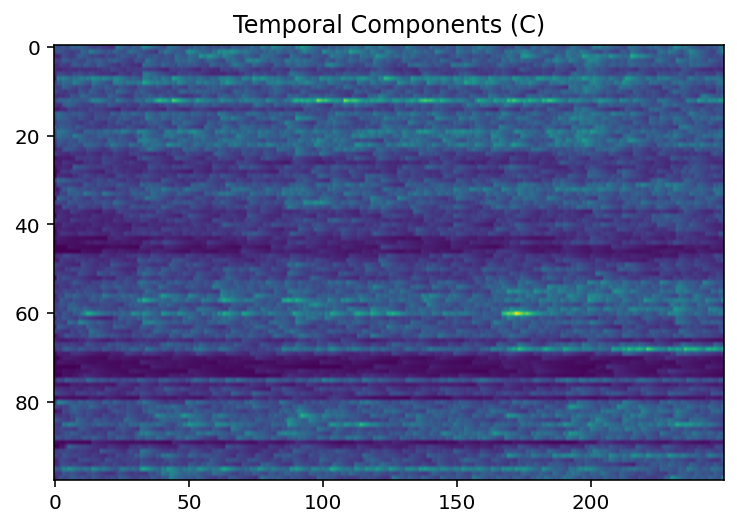

In [38]:
plt.imshow(c[:,:250], aspect='auto')
plt.title('Temporal Components (C)')
plt.show()

Text(0.5, 0.98, 'Denoised Traces')

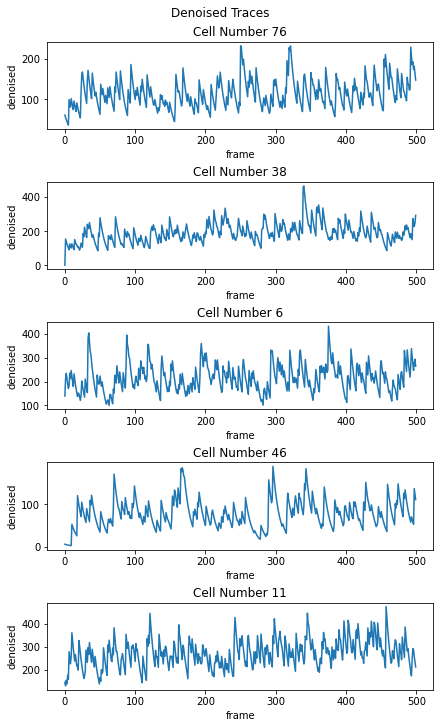

In [27]:
randcells = np.random.choice(np.arange(c.shape[0]), 5, replace=False)
fig, axes = plt.subplots(5,1, constrained_layout=True, figsize=(6,10))

for ax,rc in zip(axes, randcells):
    ax.plot(c[rc, :500])
    ax.set_title(f'Cell Number {rc}')
    ax.set_ylabel('denoised')
    ax.set_xlabel('frame')
    
fig.suptitle('Denoised Traces')
plt.show()

Text(0.5, 0.98, 'Noisy Traces')

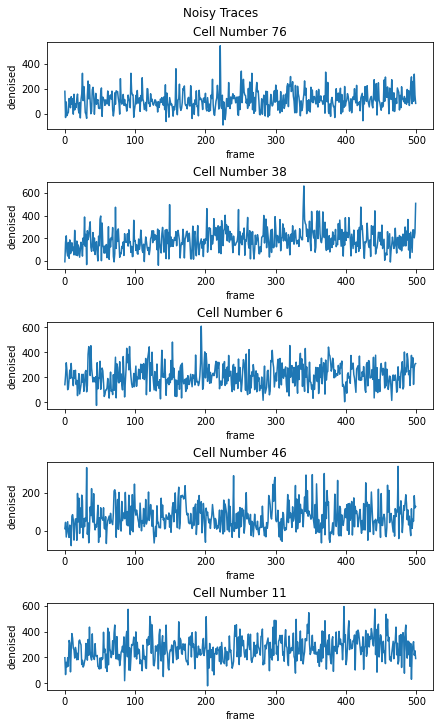

In [28]:
# randcells = np.random.choice(np.arange(c.shape[0]), 5, replace=False)
fig, axes = plt.subplots(5,1, constrained_layout=True, figsize=(6,10))

for ax,rc in zip(axes, randcells):
    ax.plot(nC[rc, :500])
    ax.set_title(f'Cell Number {rc}')
    ax.set_ylabel('denoised')
    ax.set_xlabel('frame')
    
fig.suptitle('Noisy Traces')

In [29]:
dims = data[0]['dims']
a2 = a.reshape((*dims, -1), order='F')
a2.shape

(512, 274, 98)

Text(0.5, 1.0, 'Spatial Component')

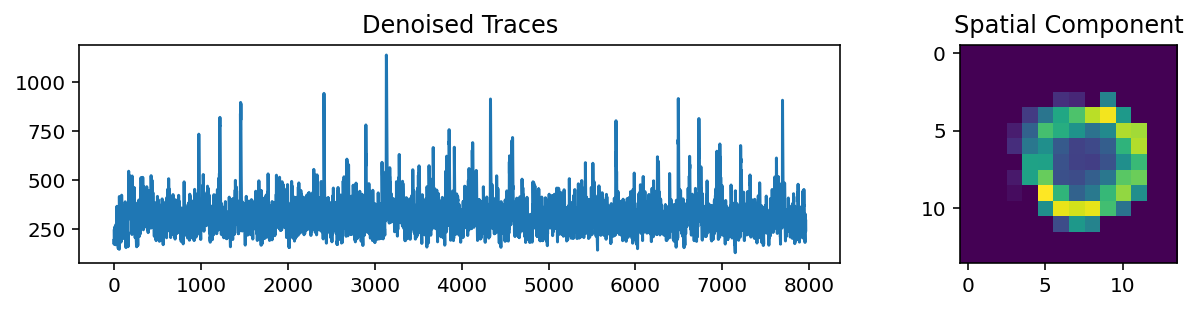

In [84]:
cell = 55

fig, axes = plt.subplots(1,2, figsize=(10,2), gridspec_kw=dict(width_ratios=(3,1)))

bbox_radius = 7
x,y,z = locs[cell]
xs = np.arange(x-bbox_radius, x+bbox_radius, dtype=int)
ys = np.arange(y-bbox_radius, y+bbox_radius, dtype=int)
mask = np.ix_(ys,xs)

axes[0].plot(c[cell, :])
axes[0].set_title('Denoised Traces')

axes[1].imshow(a2[:,:,cell][mask], origin='upper', aspect='equal')
axes[1].set_title('Spatial Component')

Text(0.5, 1.0, 'Extracted Spatial Components')

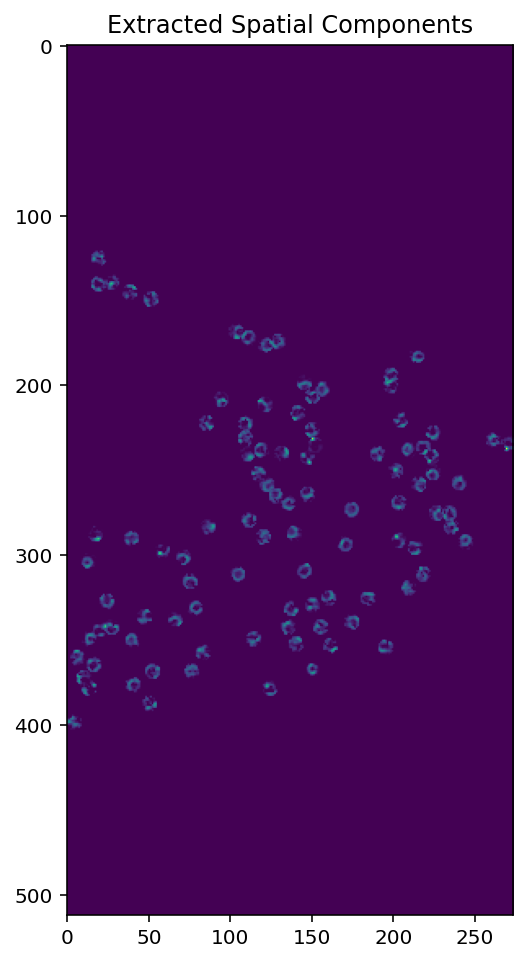

In [85]:
fig, ax = plt.subplots(1,1, figsize=(4,8))
ax.imshow(a2.max(2), aspect='auto')
ax.set_title('Extracted Spatial Components')

## The full caiman result object can be accessed also

The results are stored in `tiff_folder/live2p/out`

In [5]:
from pathlib import Path
from live2p.utils import load_acid

In [6]:
result_path = Path(tiff_folder, 'live2p/out/realtime_results_plane_0.hdf5')
result_path.exists()

True

In [7]:
result = load_acid(result_path)

00038319 - INFO     - [params:set:972] - Changing key decay_time in group data from 0.4 to 1.0
00038321 - INFO     - [params:set:972] - Changing key dims in group data from None to (512, 274)
00038323 - INFO     - [params:set:972] - Changing key fnames in group data from None to [b'initplane0_d1_512_d2_274_d3_1_order_C_frames_704_.mmap']
00038325 - INFO     - [params:set:972] - Changing key last_commit in group data from GITW-3a94bb6073cb8c3d2af63703dc4ec0dc6ef4a95d to FILE-1633631693
00038327 - INFO     - [params:set:972] - Changing key nb in group init from 1 to 3
00038329 - INFO     - [params:set:972] - Changing key indices in group motion from (slice(None, None, None), slice(None, None, None)) to [b'slice(None, None, None)' b'slice(None, None, None)']
00038331 - INFO     - [params:set:972] - Changing key niter_rig in group motion from 1 to 2
00038333 - INFO     - [params:set:972] - Changing key splits_els in group motion from 14 to 8
00038335 - INFO     - [params:set:972] - Changin

### Caiman results is an object, results are stored in estimates

In [8]:
result.estimates

In [9]:
result.estimates.C

array([[1.6268209 , 0.22241262, 1.1518438 , ..., 2.0028028 , 0.8260358 ,
        0.31445798],
       [0.8711551 , 1.316208  , 1.1355656 , ..., 0.9001326 , 0.71869916,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.9946097 , 1.1824663 ,
        0.        ],
       ...,
       [0.37520224, 0.        , 0.00770863, ..., 0.9788135 , 1.8123955 ,
        0.33627266],
       [0.        , 0.90839106, 0.6279776 , ..., 0.83835036, 0.24782202,
        0.2615928 ],
       [0.        , 0.47664294, 1.6981168 , ..., 0.82017654, 1.3534408 ,
        0.55204934]], dtype=float32)

In [22]:
# deconvolve
result.estimates.deconvolve(result.params)
spks = result.estimates.S

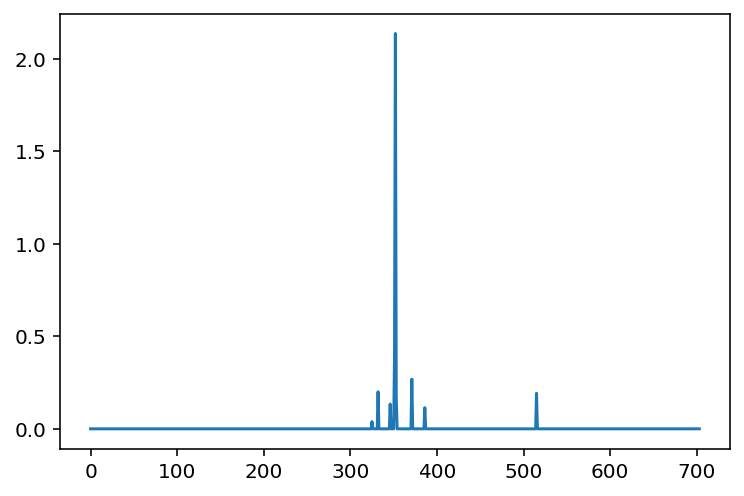

In [25]:
plt.plot(spks[20,:])